# Reflexer Model & Simulation

In [63]:
%load_ext autoreload
%autoreload 2

import pandas as pd
pd.options.mode.chained_assignment = None

from models.v1.run import run

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
drop_midsteps = True
fdf = run(drop_midsteps)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (720, 13, 1, 15)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 1.30s


In [65]:
#df = fdf
df = fdf[fdf.timestep < 100]

In [66]:
import matplotlib.pyplot as plt

pd.options.plotting.backend = "plotly"

In [67]:
FXcols = [
    'error_star',
    'error_hat',
    'old_error_star',
    'old_error_hat',
    'error_star_integral',
    'error_hat_integral',
    'error_star_derivative',
    'error_hat_derivative',
    'target_rate',
    'target_price',
    'market_price',
    'debt_price'
]

In [68]:
for c in FXcols:
    print(c)
    df[c] = df[c].apply(lambda x: float(x))

error_star
error_hat
old_error_star
old_error_hat
error_star_integral
error_hat_integral
error_star_derivative
error_hat_derivative
target_rate
target_price
market_price
debt_price


In [69]:
df['target_rate_hourly'] = df.target_rate * 3600
df['error_star_derivative_scaled'] = df.error_star_derivative * 3600
df['error_hat_derivative_scaled'] = df.error_star_derivative * 3600

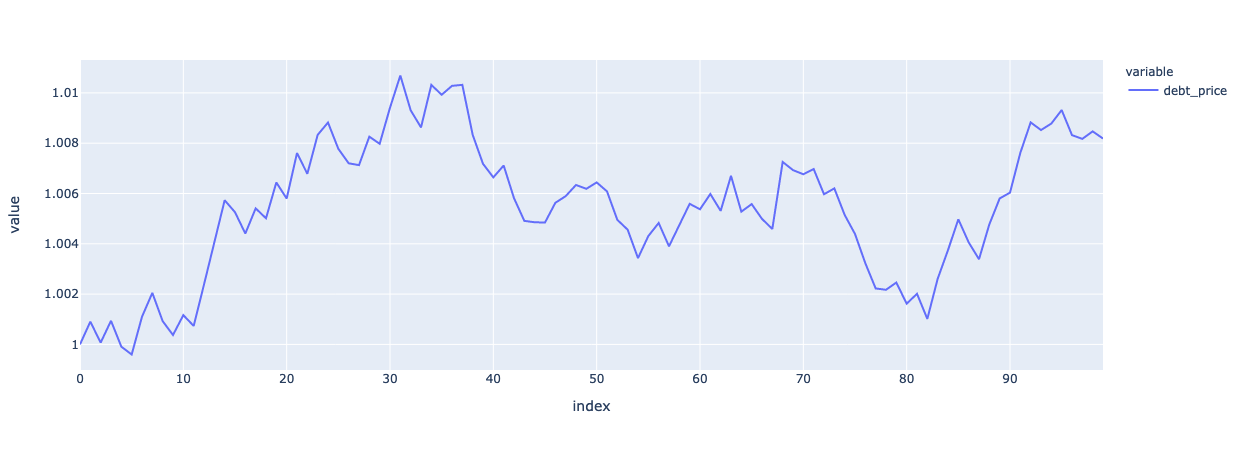

In [70]:
df.debt_price.plot()

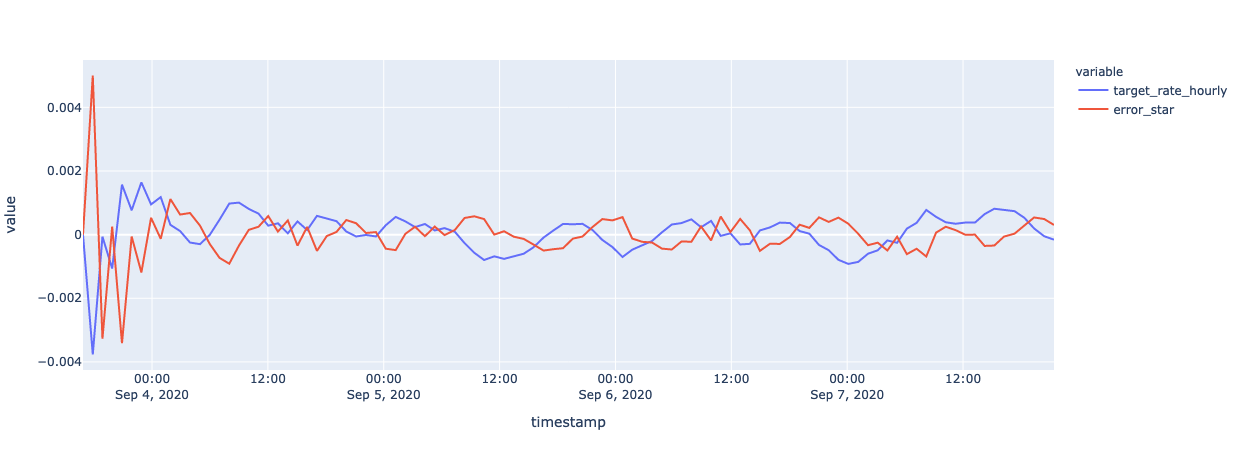

In [71]:
df.plot(kind='line', x='timestamp', y=['target_rate_hourly', 'error_star'])

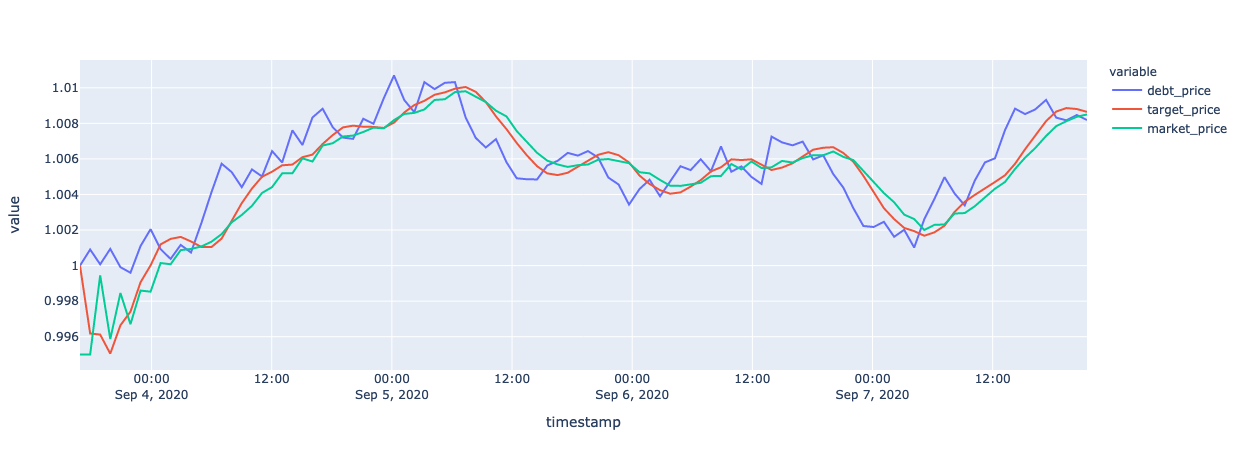

In [72]:
df.plot(kind='line', x='timestamp', y=['debt_price', 'target_price', 'market_price'])

Text(0, 0.5, 'Observed Error')

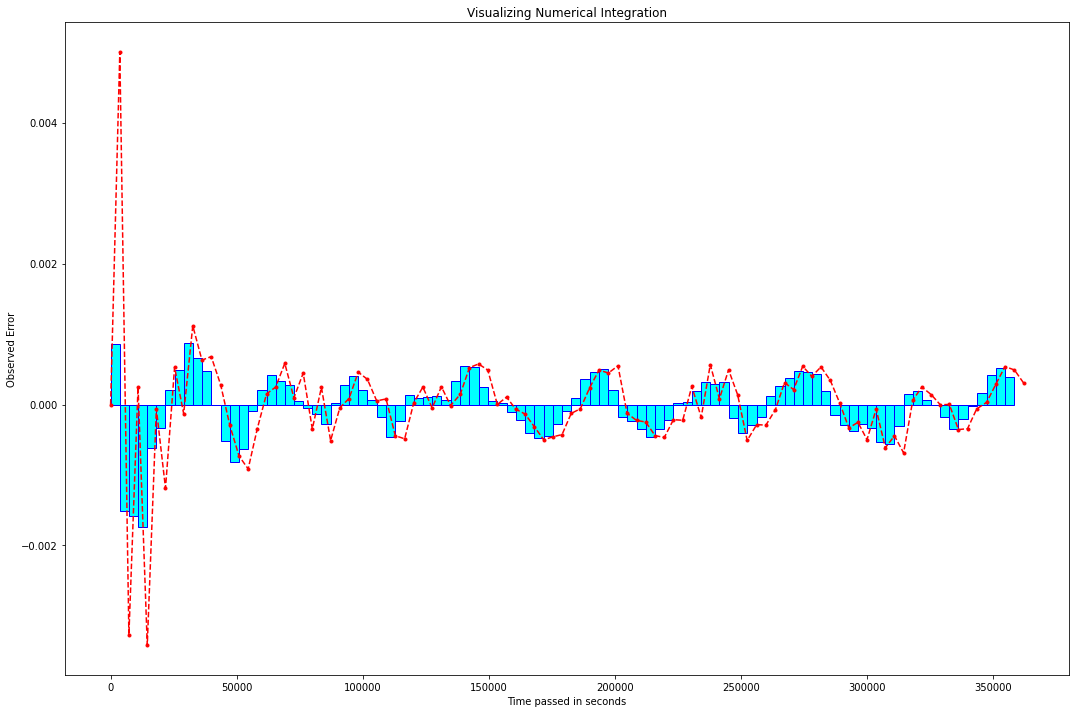

In [73]:
from matplotlib.patches import Rectangle

df['seconds'] = df.timedelta.cumsum()


x=df.seconds.values
y=df.error_star.values
h=(df.error_star.shift(periods=-1)+df.error_star)/2
w=df.timedelta.values

plt.figure(figsize=(18, 12))
plt.plot(x,y , marker='.',linestyle='--', color='r')

ax = plt.gca()

for p in range(len(x)-1):
    ax.add_patch(
        Rectangle(
        (x[p], 0),
        w[p+1],
        h[p+1],
        edgecolor = 'blue',
        facecolor = 'cyan',
        fill=True
     ) )

plt.title('Visualizing Numerical Integration')
plt.xlabel('Time passed in seconds')
plt.ylabel('Observed Error')

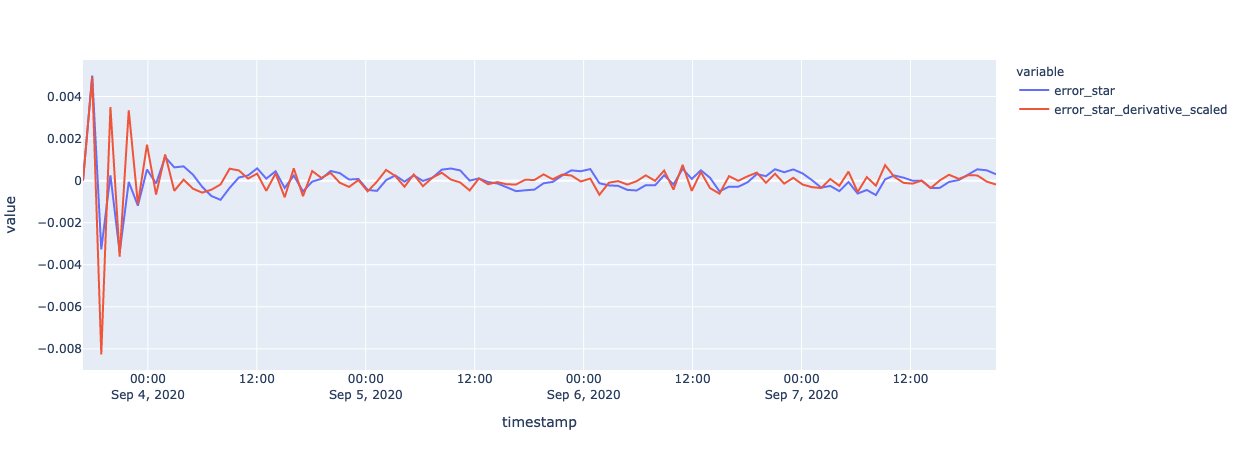

In [74]:
df.plot(kind='line', x='timestamp', y=['error_star','error_star_derivative_scaled'])